# Script para automatização de processos de consulta.
     - Inserindo um estado ele procisa me retornar:
     - Numero total de aeroportos com suas classificações
     - Tipos de pavimento de aeroportos e quantidade
     - Total de aeroportos e sua categoria
     - Extensão total de rodovias de acordo com seus pavimentos

In [34]:
# Importando bibliotecas necessárias
import geopandas as gpd
import os
import matplotlib
import matplotlib.pyplot as plt
import shapely

def path_lista():
    path_municipios = os.getcwd()+'//dados//municipios.shp'
    path_aeroportos = os.getcwd()+'//dados//aeroportos.shp'
    path_rodovias = os.getcwd()+'//dados/rodovias.shp'
    
    return[path_municipios, path_aeroportos, path_rodovias]

def open_shapefile():
    
    return [gpd.read_file(i) for i in path_lista()]

def filter_municipios(state, shape):
     
    return  shape [shape['uf'] == state] 

def airports(shape,municipio_filtrado):
    gdf = gpd.sjoin(shape, municipio_filtrado, predicate='within')
    total_airports = gdf.value_counts('TipoAero')
    total_pavi =  gdf.value_counts('pavimento')
    
    return gdf,total_airports,total_pavi

def run(state):
    shape = open_shapefile()
    municipio_filter = filter_municipios(state,shape[0])
    gdf,aeroportos, pavimentos = airports(shape[1],municipio_filter)
    print(aeroportos,pavimentos)
    gdf.plot()
    
    return

TipoAero
Nacional         97
Internacional     2
dtype: int64 pavimento
asfalto ou concreto Asfáltico    43
grama                            37
terra                            12
cascalho                          6
saibro                            1
dtype: int64


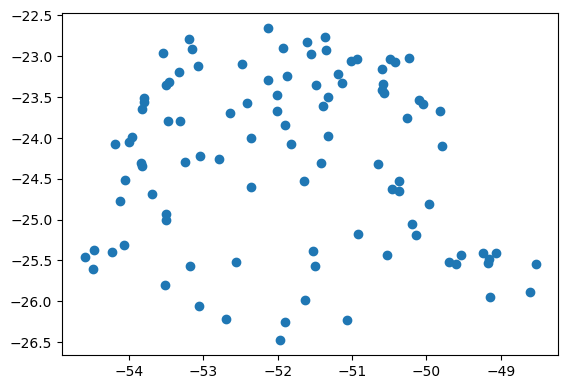

In [35]:
run('PR')